## Preparation

In [27]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import os
path = "/content/drive/MyDrive/ColabNotebooks/DD2360/hw3_1"
os.chdir(path)
!ls

ex_1  ex_1.cu  try  try.cu  vectorAdd  vectorAdd.cu


In [6]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2021 NVIDIA Corporation
Built on Sun_Feb_14_21:12:58_PST_2021
Cuda compilation tools, release 11.2, V11.2.152
Build cuda_11.2.r11.2/compiler.29618528_0


## Compiling and Execution

In [25]:
!nvcc -arch=sm_75 ex_1.cu -o ex_1

In [26]:
!./ex_1 131080

The input length is 131080
Data copy from host to device time: 0.000598
Kernel launching time: 0.000108
Data copy from device to host time: 0.000761


## NVIDIA Nsight Systems for Profiling

In [21]:
!/usr/local/cuda-11/bin/nv-nsight-cu-cli ./ex_1 131070

The input length is 131070
==PROF== Connected to process 1017 (/content/drive/MyDrive/ColabNotebooks/DD2360/hw3_1/ex_1)
==PROF== Profiling "vecAdd" - 1: 0%....50%....100% - 8 passes
hejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhejhe

## Stacked bar chart showing the breakdown of time

In [28]:
!./ex_1 132000

The input length is 132000
Data copy from host to device time: 0.000573
Kernel launching time: 0.000109
Data copy from device to host time: 0.000795


In [29]:
!./ex_1 140000

The input length is 140000
Data copy from host to device time: 0.000593
Kernel launching time: 0.000098
Data copy from device to host time: 0.000879


In [30]:
!./ex_1 160000

The input length is 160000
Data copy from host to device time: 0.000703
Kernel launching time: 0.000069
Data copy from device to host time: 0.001178


In [31]:
!./ex_1 170000

The input length is 170000
Data copy from host to device time: 0.000665
Kernel launching time: 0.000072
Data copy from device to host time: 0.000994


In [32]:
!./ex_1 180000

The input length is 180000
Data copy from host to device time: 0.000722
Kernel launching time: 0.000059
Data copy from device to host time: 0.001158


In [33]:
!./ex_1 190000

The input length is 190000
Data copy from host to device time: 0.000725
Kernel launching time: 0.000066
Data copy from device to host time: 0.001167


In [34]:
!./ex_1 200000

The input length is 200000
Data copy from host to device time: 0.000866
Kernel launching time: 0.000074
Data copy from device to host time: 0.001363


In [35]:
!./ex_1 250000

The input length is 250000
Data copy from host to device time: 0.001059
Kernel launching time: 0.000111
Data copy from device to host time: 0.001822


In [36]:
!./ex_1 270000

The input length is 270000
Data copy from host to device time: 0.001062
Kernel launching time: 0.000098
Data copy from device to host time: 0.001526


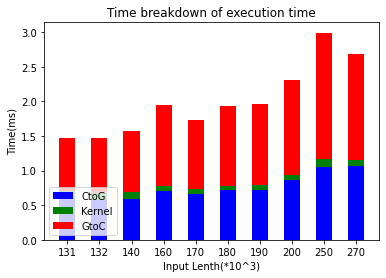

In [44]:
import numpy as np
import matplotlib.pyplot as plt

plt.title('Time breakdown of execution time')

N = 10
plt.xlabel('Input Lenth(*10^3)')
ind = np.arange(N)  #[ 0  1  2  3  4  5  6  7  8  9 ]
plt.xticks(ind, ('131', '132', '140', '160', '170', '180', '190', '200', '250', '270'))

plt.ylabel('Time(ms)')
plt.yticks(np.arange(0, 3.5, 0.5))

CtoG = (0.598, 0.573, 0.593, 0.703, 0.665, 0.722, 0.725, 0.866, 1.059, 1.062)
Kernel = (0.108, 0.109, 0.098, 0.069, 0.072, 0.059, 0.066, 0.074, 0.111, 0.098)
GtoC = (0.761, 0.795, 0.879, 1.178, 0.994, 1.158, 1.167, 1.363, 1.822, 1.526)

d = []
for i in range(0, len(CtoG)):
    sum = CtoG[i] + Kernel[i]
    d.append(sum)

width = 0.5  # 设置条形图一个长条的宽度
p1 = plt.bar(ind, CtoG, width, color='blue') 
p2 = plt.bar(ind, Kernel, width, bottom=CtoG,color='green')  
p3 = plt.bar(ind, GtoC, width, bottom=d,color='red')

plt.legend((p1[0], p2[0], p3[0]), ('CtoG', 'Kernel', 'GtoC'),loc = 3)

plt.show()

In [55]:
!nvcc -arch=sm_75 try.cu -o try

In [56]:
!./try 100

The input length is 100
hejCPU vector addition time: 0.000001GPU vector addition time: 0.000025GPU vector addition + data transfer time: 0.000038